In [4]:
import pypsa
import numpy as np

In [2]:
network = pypsa.Network()


In [4]:
n_buses = 5
for i in range(n_buses):
    network.add("Bus", "bus {}".format(i), v_nom=1.0)

network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
bus 0,1.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
bus 1,1.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
bus 2,1.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
bus 3,1.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
bus 4,1.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,


In [5]:
network1 = pypsa.Network()

In [6]:
#add three buses
n_buses = 3

for i in range(n_buses):
    network1.add("Bus", "My bus {}".format(i),  v_nom=20.)

In [7]:
 #add three lines in a ring
for i in range(n_buses):
    network1.add("Line", "My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%3),
                x=0.1,
                r=0.01)

#add a generator at bus 0
network1.add("Generator", "My gen",
            bus="My bus 0",
            p_set=100,
            control="PQ")


#add a load at bus 1
network1.add("Load", "My load",
            bus="My bus 1",
            p_set=100,
            q_set=100)

In [8]:
network1.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 1,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 2,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,


In [9]:

network1.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
My gen,My bus 0,PQ,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [10]:
network1.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
network1.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
My load,My bus 1,,,100.0,100.0,-1.0


In [12]:
network1.loads.q_set = 100.0

In [13]:
network1.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.336483 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         4.753531e-10,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [14]:
network1.lines_t.p0

,My line 0,My line 1,My line 2
snapshot,,,
now,66.897487,-33.333333,-33.391038


In [15]:
network1.buses_t.v_ang * 180 / np.pi

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,0.0,-0.875939,-0.433813


In [16]:

network1.buses_t.v_mag_pu

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,1.0,0.981199,0.99057


In [17]:
network1.determine_network_topology()

In [18]:
import matplotlib.pyplot as plt

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pypsa.plot import add_legend_circles

(<matplotlib.collections.PatchCollection at 0x21c100bc130>,
 <matplotlib.collections.LineCollection at 0x21c100bcb50>)

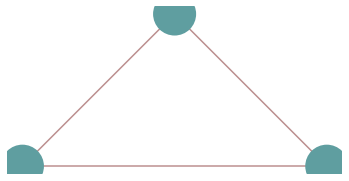

In [19]:
network1.plot()

In [20]:
network1.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
My gen,My bus 0,Slack,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
